In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('/content/4) house Prediction Data Set.csv', header=None, delim_whitespace=True)
df.head()

/tmp/ipython-input-3129222002.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/4) house Prediction Data Set.csv', header=None, delim_whitespace=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
columns = [
    'CRIM',      # per capita crime rate by town
    'ZN',        # proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS',     # proportion of non-retail business acres per town
    'CHAS',      # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    'NOX',       # nitric oxides concentration (parts per 10 million)
    'RM',        # average number of rooms per dwelling
    'AGE',       # proportion of owner-occupied units built prior to 1940
    'DIS',       # weighted distances to five Boston employment centres
    'RAD',       # index of accessibility to radial highways
    'TAX',       # full-value property-tax rate per $10,000
    'PTRATIO',   # pupil-teacher ratio by town
    'B',         # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'LSTAT',     # % lower status of the population
    'MEDV'       # Median value of owner-occupied homes in $1000's
]

df.columns = columns
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
df.shape

(506, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [17]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


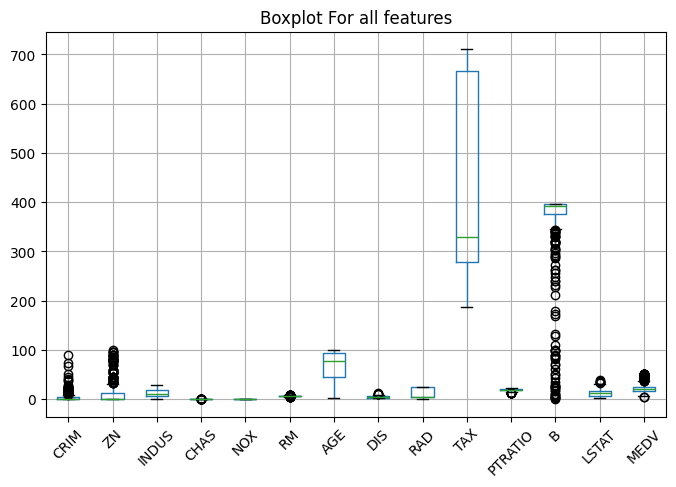

In [25]:
plt.figure(figsize=(8,5))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot For all features")
plt.show()

In [30]:
cols_with_outliers = ['CRIM', 'ZN', 'B', 'LSTAT', 'MEDV']
df_cleaned = df.copy()
for column in cols_with_outliers :
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]


print(f"Original DataFrame shape: {df.shape[0]}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape[0]}")



Original DataFrame shape: 506
Cleaned DataFrame shape: 297


In [32]:
scaler = StandardScaler()
scaled_df = df_cleaned.copy()
scaled_df[scaled_df.columns] = scaler.fit_transform(scaled_df)
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.536581,1.580373,-1.327383,-0.275839,-0.027430,0.773405,-0.093771,0.111354,-0.905500,-0.464669,-1.728328,0.714182,-1.311328,0.456399
1,-0.525954,-0.475515,-0.566917,-0.275839,-0.711355,0.467060,0.428534,0.616634,-0.759895,-0.844756,-0.429852,0.714182,-0.543743,-0.029735
2,-0.525964,-0.475515,-0.566917,-0.275839,-0.711355,1.986851,-0.250081,0.616634,-0.759895,-0.844756,-0.429852,0.355557,-1.486617,2.623747
3,-0.523392,-0.475515,-1.348152,-0.275839,-0.820387,1.614860,-0.833385,1.247499,-0.614289,-0.985529,0.037599,0.514163,-1.687739,2.360424
4,-0.504820,-0.475515,-1.348152,-0.275839,-0.820387,1.911259,-0.513139,1.247499,-0.614289,-0.985529,0.037599,0.714182,-1.246747,2.927581


In [34]:
scaled_df.to_csv('cleaned_preprocessed_dataset.csv', index=False)
